In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle
import joblib
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('high_diamond_ranked_10min.csv')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

# 최소 변수만 사용

In [5]:
Xh = df[0:5]
Xh
Xh.to_csv("lol_head.csv")

In [6]:
y = df.blueWins
X = df.drop(columns=['blueWins','gameId'])

In [17]:
minlist = ['blueWardsPlaced','blueFirstBlood','blueKills','blueDeaths','blueDragons','blueTotalGold','blueTotalExperience','blueGoldDiff','blueExperienceDiff','redWardsPlaced','redDragons','redTowersDestroyed','redTotalExperience','redTotalJungleMinionsKilled']

minscalar = ['blueWardsPlaced','blueKills','blueDeaths','blueDragons','blueTotalGold','blueTotalExperience','blueGoldDiff','blueExperienceDiff','redWardsPlaced','redDragons','redTowersDestroyed','redTotalExperience','redTotalJungleMinionsKilled']

In [20]:
X[minlist].head()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<Axes: >

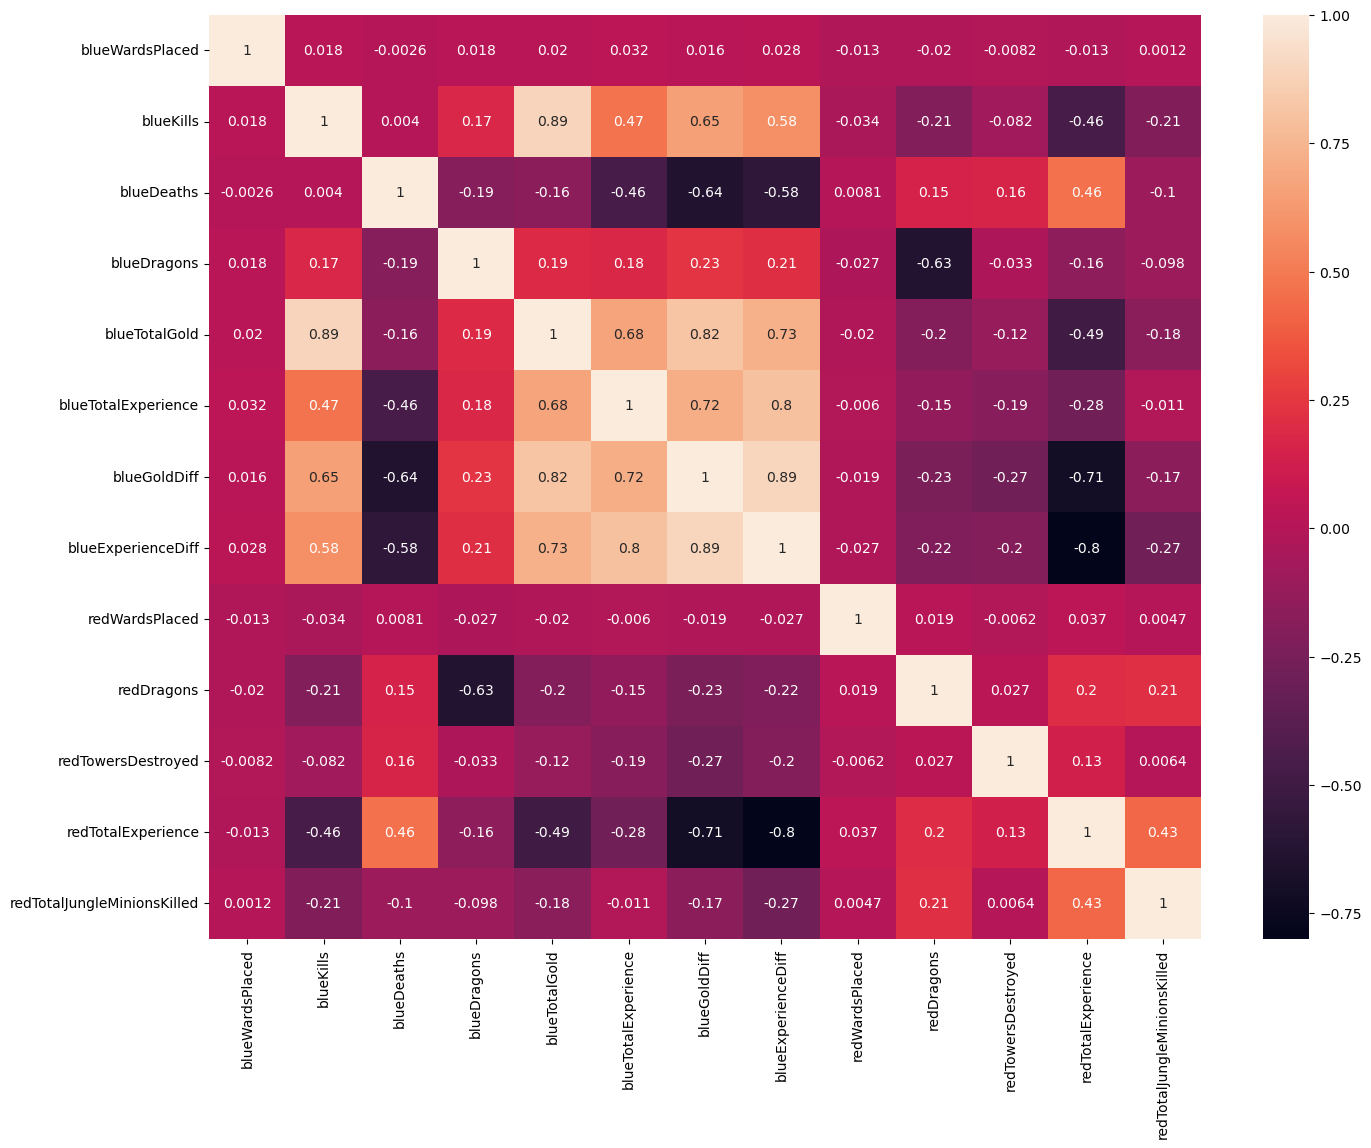

In [8]:
plt.figure(figsize=(16, 12))
sns.heatmap(df[minscalar].corr(), annot=True)

In [9]:
# train test split scale the set
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
y = df.blueWins
X = df.drop(columns=['blueWins','gameId'])
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)